In [1]:
import pandas as pd
import yfinance as yf
import datetime
from datetime import date, timedelta


In [2]:
today = date.today()
today

datetime.date(2022, 12, 27)

In [3]:
d1 = today.strftime("%Y-%m-%d")
end_date = d1
end_date

'2022-12-27'

In [4]:
d2 = date.today() - timedelta(days= 720)
d2 = d2.strftime("%Y-%m-%d")
start_date = d2; start_date


'2021-01-06'

In [5]:
data = yf.download("AAPL", start= start_date, end= end_date, progress= False)
data.head()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2021-01-06,127.720001,131.050003,126.379997,126.599998,125.098267,155088000
2021-01-07,128.360001,131.630005,127.860001,130.919998,129.367020,109578200
2021-01-08,132.429993,132.630005,130.229996,132.050003,130.483627,105158200
2021-01-11,129.190002,130.169998,128.500000,128.979996,127.450043,100384500
2021-01-12,128.500000,129.690002,126.860001,128.800003,127.272194,91951100


In [6]:
# save to csv file
data.to_csv("AAPL.csv", index= False)

some visualization and analysis

In [7]:
data.index

DatetimeIndex(['2021-01-06', '2021-01-07', '2021-01-08', '2021-01-11',
               '2021-01-12', '2021-01-13', '2021-01-14', '2021-01-15',
               '2021-01-19', '2021-01-20',
               ...
               '2022-12-12', '2022-12-13', '2022-12-14', '2022-12-15',
               '2022-12-16', '2022-12-19', '2022-12-20', '2022-12-21',
               '2022-12-22', '2022-12-23'],
              dtype='datetime64[ns]', name='Date', length=497, freq=None)

In [8]:
import plotly.express as px
figure = px.line(data, x= data.index, y= "Close", title= "Time series analysis(Line Plot)")
figure.show()

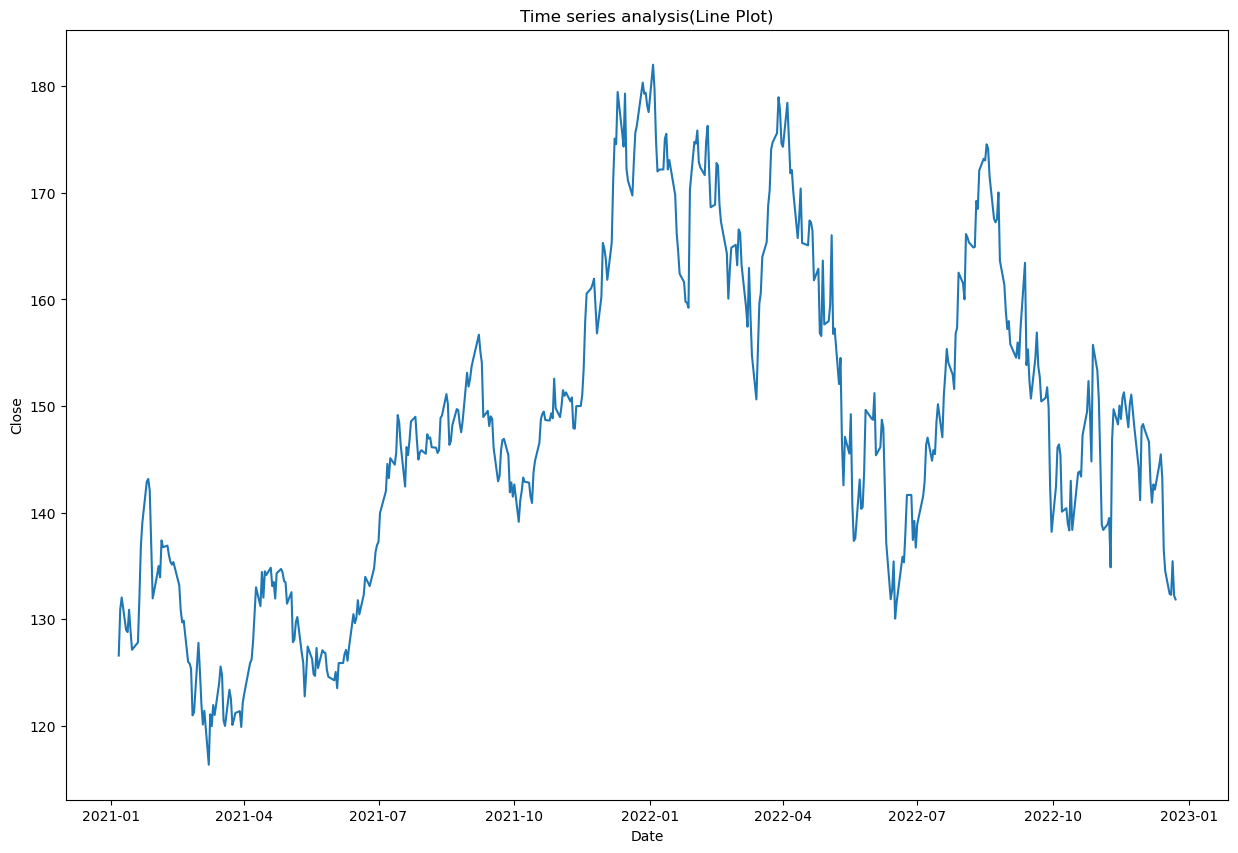

In [9]:
# using matplotlib
import matplotlib.pyplot as plt

plt.figure(figsize=(15, 10))
plt.title("Time series analysis(Line Plot)")
plt.xlabel("Date")
plt.ylabel("Close")
plt.plot(data.index, data.Close, linestyle= "-")
plt.show()


a line plot enables us observe trends in timeseries data

candlestick plot

In [10]:
import plotly.graph_objects as go
figure = go.Figure(data= [go.Candlestick(x= data.index, open= data.Open, high= data.High, low= data.High, close= data.Close)])
figure.update_layout(title= "Time series analysis(Candlestick Chart)", xaxis_rangeslider_visible= False)
figure.show()


In [11]:

data.columns

Index(['Open', 'High', 'Low', 'Close', 'Adj Close', 'Volume'], dtype='object')

In [24]:

# using matplotlib
df = data.copy()
df.head()



,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2021-01-06,127.720001,131.050003,126.379997,126.599998,125.098267,155088000
2021-01-07,128.360001,131.630005,127.860001,130.919998,129.367020,109578200
2021-01-08,132.429993,132.630005,130.229996,132.050003,130.483627,105158200
2021-01-11,129.190002,130.169998,128.500000,128.979996,127.450043,100384500
2021-01-12,128.500000,129.690002,126.860001,128.800003,127.272194,91951100


In [40]:
import mplfinance as mpf


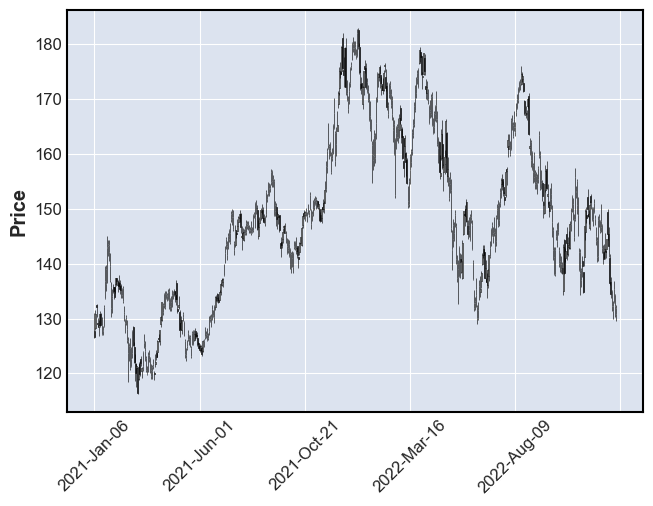

In [39]:

# Create a figure and axis

f = mpf.plot(df, type= "candlestick", volume= False)

plt.show()


In [ ]:
# barplot
figure = px.bar(data, x= data.index, y = "Close", title= "Time series analysis(Bar Plot)")
figure.show()

In [ ]:
#an interactive candlestick chart
figure = go.Figure(data= [go.Candlestick(x= data.index, open= data.Open, high= data.High, low= data.High, close= data.Close)])
figure.update_layout(title= "Time series analysis(Candlestick Chart with Buttons and Slider)")
figure.update_xaxes(
    rangeslider_visible= True,
    rangeselector= dict(
        buttons= list([
            dict(count = 1, label = "1m", step = "month", stepmode = "backward"),
            dict(count = 6, label = "6m", step = "month", stepmode = "backward"),
            dict(count = 1, label = "YTD", step = "year", stepmode = "todate"),
            dict(count = 1, label = "1y", step = "year", stepmode = "backward"),
            dict(step = "all")
        ])
    )
)
figure.show()